In [ ]:

pip install folium


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import folium

data = {
    'Zipcode': [95391, 95762, 94505, 94513, 95624, 94601, 94541, 95616, 94568, 94565,
                95811, 93611, 95336, 95901, 95304, 95658, 92878, 92602, 91708, 92630,
                91801, 91401, 92886, 92509, 90240],
    'Price_Per_Sq_Ft': [439, 369, 367, 369, 943, 473.6, 579.75, 469.5, 636, 339, 493.4,
                        249.3333333, 302.5, 273, 388.5, 480, 386.4, 869, 395.5, 624,
                        579.6666667, 562, 586, 347, 565]
}

df = pd.DataFrame(data)

# Function to get latitude and longitude from Zip Code
def get_lat_long(zipcode):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(str(zipcode))
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

df[['Latitude', 'Longitude']] = df['Zipcode'].apply(lambda x: pd.Series(get_lat_long(x)))

# Set the center coordinates for California
california_center = [36.7783, -119.4179]

# Create a folium map
my_map = folium.Map(location=california_center, zoom_start=6)

# Add blobs for each Zip Code with size based on 'Price_Per_Sq_Ft'
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Price_Per_Sq_Ft'] / 50,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=f"Zip Code: {row['Zipcode']}, Price per sq ft: {row['Price_Per_Sq_Ft']}"
    ).add_to(my_map)
my_map


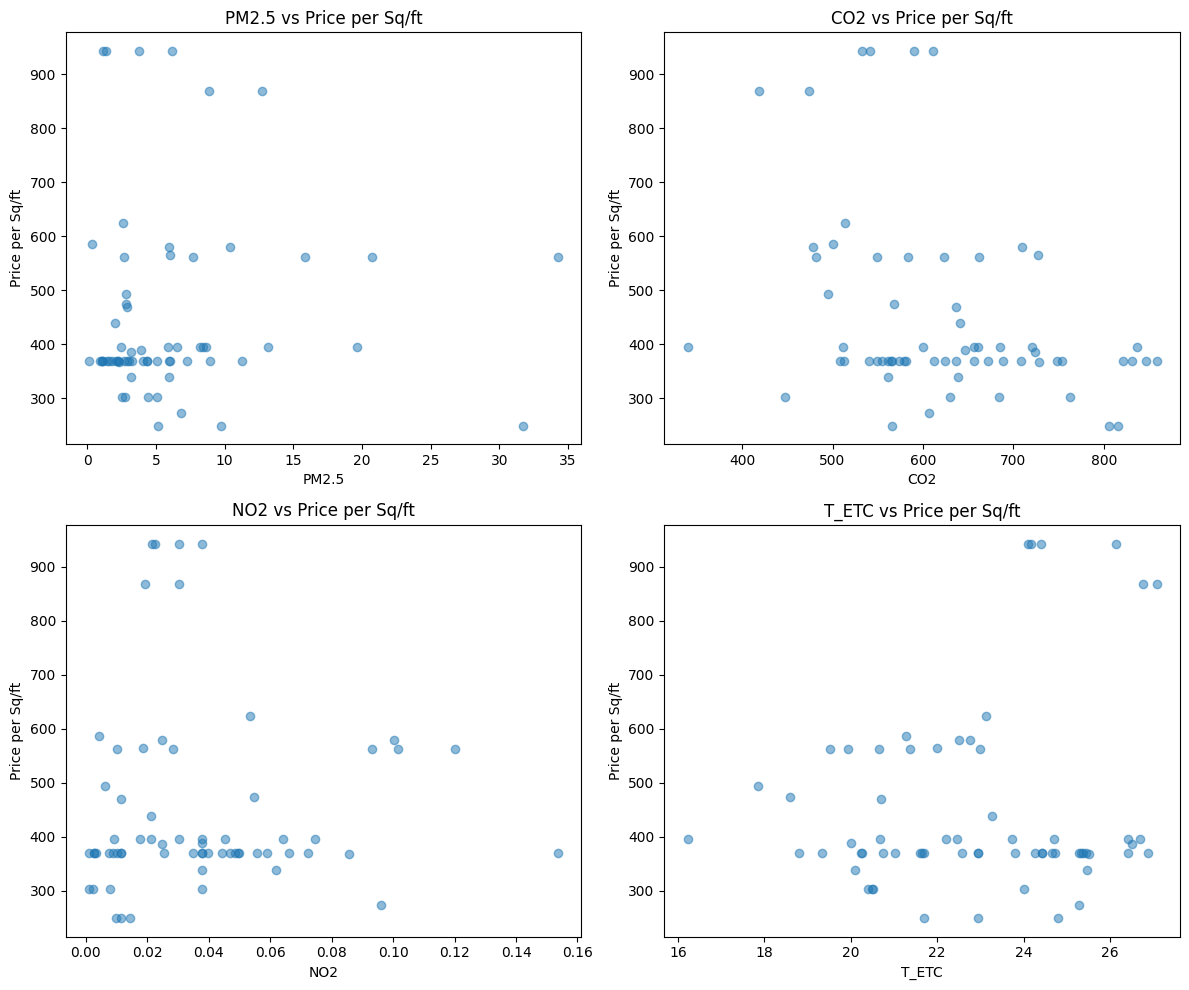

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/content/Mesbahs (1).xlsx'
df = pd.read_excel(file_path)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# PM2.5 vs Price per Sq/ft
axes[0, 0].scatter(df['PM_MET_IN1'], df['Price per Sq/ft'], alpha=0.5)
axes[0, 0].set_title('PM2.5 vs Price per Sq/ft')
axes[0, 0].set_xlabel('PM2.5')
axes[0, 0].set_ylabel('Price per Sq/ft')

# CO2 vs Price per Sq/ft
axes[0, 1].scatter(df['CO2_ETC_IN1'], df['Price per Sq/ft'], alpha=0.5)
axes[0, 1].set_title('CO2 vs Price per Sq/ft')
axes[0, 1].set_xlabel('CO2')
axes[0, 1].set_ylabel('Price per Sq/ft')

# NO2 vs Price per Sq/ft
axes[1, 0].scatter(df['NO2_AQL_IN1'], df['Price per Sq/ft'], alpha=0.5)
axes[1, 0].set_title('NO2 vs Price per Sq/ft')
axes[1, 0].set_xlabel('NO2')
axes[1, 0].set_ylabel('Price per Sq/ft')

# T_ETC vs Price per Sq/ft
axes[1, 1].scatter(df['T_ETC_IN1'], df['Price per Sq/ft'], alpha=0.5)
axes[1, 1].set_title('T_ETC vs Price per Sq/ft')
axes[1, 1].set_xlabel('T_ETC')
axes[1, 1].set_ylabel('Price per Sq/ft')

plt.tight_layout()
plt.show()


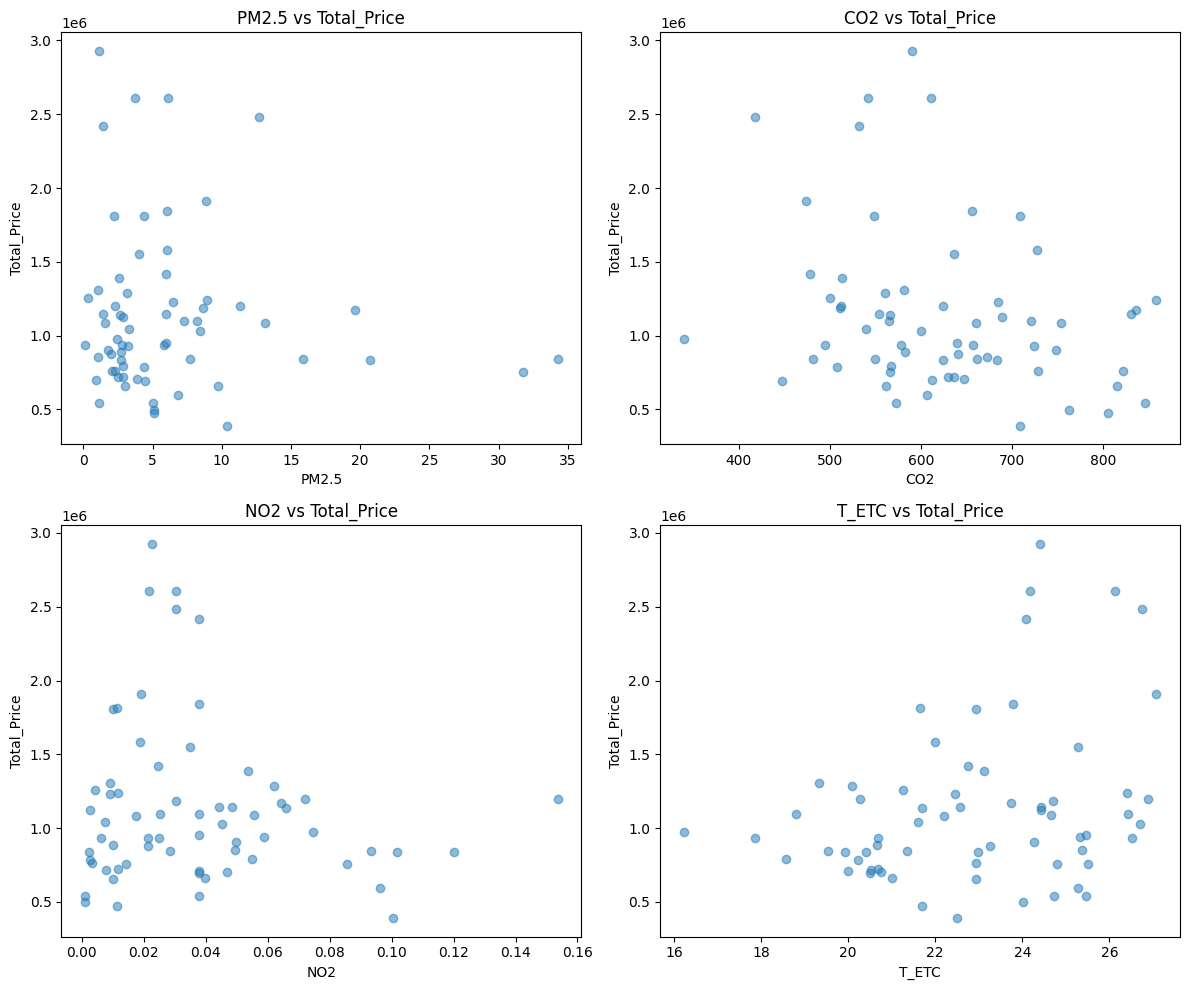

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/content/Mesbahs (1).xlsx'
df = pd.read_excel(file_path)

# Scatter plots for PM2.5, CO2, etc. vs Total_Price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# PM2.5 vs Total_Price
axes[0, 0].scatter(df['PM_MET_IN1'], df['Total_Price'], alpha=0.5)
axes[0, 0].set_title('PM2.5 vs Total_Price')
axes[0, 0].set_xlabel('PM2.5')
axes[0, 0].set_ylabel('Total_Price')

# CO2 vs Total_Price
axes[0, 1].scatter(df['CO2_ETC_IN1'], df['Total_Price'], alpha=0.5)
axes[0, 1].set_title('CO2 vs Total_Price')
axes[0, 1].set_xlabel('CO2')
axes[0, 1].set_ylabel('Total_Price')

# NO2 vs Total_Price
axes[1, 0].scatter(df['NO2_AQL_IN1'], df['Total_Price'], alpha=0.5)
axes[1, 0].set_title('NO2 vs Total_Price')
axes[1, 0].set_xlabel('NO2')
axes[1, 0].set_ylabel('Total_Price')

# T_ETC vs Total_Price
axes[1, 1].scatter(df['T_ETC_IN1'], df['Total_Price'], alpha=0.5)
axes[1, 1].set_title('T_ETC vs Total_Price')
axes[1, 1].set_xlabel('T_ETC')
axes[1, 1].set_ylabel('Total_Price')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Load the data from the Excel file
file_path = '/content/Mesbahs (1).xlsx'
df = pd.read_excel(file_path)

# Function to get latitude and longitude from City and 3-digit Zip Code
def get_lat_long(city, zip3):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(f"{city}, California")

    if location:
        return location.latitude, location.longitude
    else:
        zip_mapping = {
            '953': (37.7749, -122.4194),
            '957': (38.5816, -121.4944),
            '900': (34.0522, -118.2437),
            '925': (37.7749, -122.4194),
        }
        return zip_mapping.get(str(zip3), (None, None))

# Apply the function to get latitudes and longitudes
df[['Latitude', 'Longitude']] = df.apply(lambda row: pd.Series(get_lat_long(row['City'], row['Zipcode'])), axis=1)

# Filter out rows with missing values
df = df.dropna(subset=['Latitude', 'Longitude', 'Total_Price', 'Price per Sq/ft', 'CO2_ETC_IN1', 'NO2_AQL_IN1', 'PM_MET_IN1'])

# Create a folium map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=6)

# Add markers for each house location with pop-ups
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Total Price: ${row['Total_Price']:,}, Price per Sqft: ${row['Price per Sq/ft']:.2f}, CO2: {row['CO2_ETC_IN1']:.2f}, NO2: {row['NO2_AQL_IN1']:.2f}, PM2.5: {row['PM_MET_IN1']:.2f}"
    ).add_to(my_map)

my_map.save('/content/interactive_map.html')

my_map
